**Hipótesis 1:** predecir cuándo será venta y cuándo no lo será analizando un conjunto de datos de la tienda online de Amazon.

Librerías

In [ ]:
#librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import LabelEncoder

#modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#red neuronal
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow import keras
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM
from tensorflow.keras.preprocessing import sequence

#Bert model
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from torch.optim import AdamW
from torch.cuda.amp import autocast, GradScaler

#metricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix

Regresión logística

Hipótesis:

Para predecir la relación entre precio, descuento y cantidad de ventas para ello agrego una variable que determine cuándo es venta y cuándo no lo es:

rating_count < 100 == 0 No venta

rating_count > 100 == 1 Venta

rating_count es la cantidad de resenias que tiene un producto, es decir que representa su popularidad, la cantidad de veces que fue comprado y que los usuarios dieron su opinión por tanto es lo más cercano que podemos obtener a un venta - no venta

In [ ]:
#cargamos el datase
sellers = pd.read_csv("Amazon.csv")
sellers

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,₹259,₹999,74%,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹1,299","₹2,495",48%,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237..

In [ ]:
sellers.describe().T

,count,unique,top,freq
product_id,1465,1351,B09CMP1SC8,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,26,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Limpieza del dataset Amazon.csv

In [ ]:
sellers['discounted_price'] = sellers['discounted_price'].str.replace("₹", '')
sellers['actual_price'] = sellers['actual_price'].str.replace("₹", '')
sellers['discount_percentage'] = sellers['discount_percentage'].str.replace("%", '')
sellers['actual_price'] = sellers['actual_price'].str.replace(",", '')
sellers['rating_count'] = sellers['rating_count'].str.replace(",", '')
sellers

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279,375,26,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","1,299",2495,48,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom.

In [ ]:
#valores nulos
count_nan = sellers.isnull().sum()
count_nan

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
#buscamos los valores nulos
rows_with_null = sellers[sellers.isnull().any(axis=1)]
rows_with_null
sellers.iloc[1463]

,1463
product_id,B0BQRJ3C47
product_name,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple..."
category,Computers&Accessories|Accessories&Peripherals|...
discounted_price,249
actual_price,999
discount_percentage,75
rating,5
rating_count,NaN
about_product,💎[The Fastest Charge] - This iPhone USB C cabl...
user_id,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ


In [ ]:
sellers.iloc[1366]

,1366
product_id,B0B94JPY2N
product_name,Amazon Brand - Solimo 65W Fast Charging Braide...
category,Computers&Accessories|Accessories&Peripherals|...
discounted_price,199
actual_price,999
discount_percentage,80
rating,3
rating_count,NaN
about_product,USB C to C Cable: This cable has type C connec...
user_id,AE7CFHY23VAJT2FI4NZKKP6GS2UQ


In [ ]:
#buscamos una referencia donde ratin sea de 5 puntos
rating_5 = sellers[sellers['rating']== '5']
rating_5['review_title']

,review_title
1219,"Very responsive and stylish mouse,Simply Aweso..."
1456,"Good,Superb quality,Good products nice one,Wo..."
1463,Awesome Product


In [ ]:
#se le asigna a los valores NaN el valor: 1 en la columna rating count  -
sellers.fillna(1, inplace=True)
sellers

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44,4.2,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20,4.3,27201,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279,375,26,4.3,31534,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B0BPCJM7TB,WIDEWINGS Electric Handheld Milk Wand Mixer Fr...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74,4,43,The battery operated milk frother is easy to c...,"AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...","Priti Sharma,ramya,Aman,ShashankVerma,Ved,Sush...","R35KB9ZGJU69DM,R2WAUSC1WTJAI1,R3602Y24JS49JI,R...","Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,https://m.media-amazon.com/images/I/41sJ4KQa5x...,https://www.amazon.in/WIDEWINGS-Electric-Handh...
1461,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","1,299",2495,48,2,2,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom.

In [ ]:
#controlamos los valores NaN
count_nan = sellers.isnull().sum()
count_nan

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


Hipótesis: El usuario toma la decisión de comprar por el precio, el descuento, la categoría, la cantidad de resenias de un producto o el puntaje de las resenias?

Para resolver la hipótesis genero un nuevo dataset con estas columnas

In [ ]:
#elijo las columnas que necesito para evaluar la hipotesis
nuevo_seller = sellers[['category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]
nuevo_seller

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
1,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
2,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44,4.2,179692
3,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20,4.3,27201
4,Computers&Accessories|Accessories&Peripherals|...,279,375,26,4.3,31534
...,...,...,...,...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74,4,43
1461,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","1,299",2495,48,2,2
1462,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,279,499,44,4.8,28
1463,Computers&Accessories|Accessories&Peripherals|...,249,999,75,5,1


In [ ]:
#al parecer hay un caracter pipe en la columna rating!
nuevo_seller[nuevo_seller['rating']=='|']

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
720,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","2,099",2499,16,|,992


In [ ]:
nuevo_seller = nuevo_seller[nuevo_seller['rating'] != '|']
nuevo_seller

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
1,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
2,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44,4.2,179692
3,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20,4.3,27201
4,Computers&Accessories|Accessories&Peripherals|...,279,375,26,4.3,31534
...,...,...,...,...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74,4,43
1461,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","1,299",2495,48,2,2
1462,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,279,499,44,4.8,28
1463,Computers&Accessories|Accessories&Peripherals|...,249,999,75,5,1


In [ ]:
nuevo_seller['category'].unique
nuevo_seller['category'].dtype
nuevo_seller
#quitamos las subcategorías y nos quedamos solo con las categorías generales

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
1,Computers&Accessories|NetworkingDevices|Networ...,507,1208,58,4.1,8131
2,Computers&Accessories|NetworkingDevices|Networ...,749,1339,44,4.2,179692
3,Electronics|GeneralPurposeBatteries&BatteryCha...,399,499,20,4.3,27201
4,Computers&Accessories|Accessories&Peripherals|...,279,375,26,4.3,31534
...,...,...,...,...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,259,999,74,4,43
1461,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","1,299",2495,48,2,2
1462,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,279,499,44,4.8,28
1463,Computers&Accessories|Accessories&Peripherals|...,249,999,75,5,1


In [ ]:
nuevo_seller.describe().T
nuevo_seller.info()
nuevo_seller.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             1464 non-null   object
 1   discounted_price     1464 non-null   object
 2   actual_price         1464 non-null   object
 3   discount_percentage  1464 non-null   object
 4   rating               1464 non-null   object
 5   rating_count         1464 non-null   object
dtypes: object(6)
memory usage: 80.1+ KB


,0
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object


In [ ]:
nuevo_seller['rating'] = nuevo_seller['rating'].astype(float)
nuevo_seller['rating']

/tmp/ipython-input-4184988375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_seller['rating'] = nuevo_seller['rating'].astype(float)


,rating
0,4.1
1,4.1
2,4.2
3,4.3
4,4.3
...,...
1460,4.0
1461,2.0
1462,4.8
1463,5.0


In [ ]:
nuevo_seller['rating_count'] = pd.to_numeric(nuevo_seller['rating_count'], errors='coerce')
non_integer_values = nuevo_seller[~nuevo_seller['rating_count'].notna()]['rating_count']

non_integer_values

/tmp/ipython-input-2295539161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_seller['rating_count'] = pd.to_numeric(nuevo_seller['rating_count'], errors='coerce')


,rating_count


In [ ]:
#como rating es float no lo modificara
le = LabelEncoder()
for column_name in nuevo_seller.columns:
    if nuevo_seller[column_name].dtype == object:
        nuevo_seller[column_name] = le.fit_transform(nuevo_seller[column_name])
    else:
        pass

/tmp/ipython-input-740428648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_seller[column_name] = le.fit_transform(nuevo_seller[column_name])
/tmp/ipython-input-740428648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_seller[column_name] = le.fit_transform(nuevo_seller[column_name])
/tmp/ipython-input-740428648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
nuevo_seller.dtypes
nuevo_seller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1464 non-null   int64  
 1   discounted_price     1464 non-null   int64  
 2   actual_price         1464 non-null   int64  
 3   discount_percentage  1464 non-null   int64  
 4   rating               1464 non-null   float64
 5   rating_count         1464 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 80.1 KB


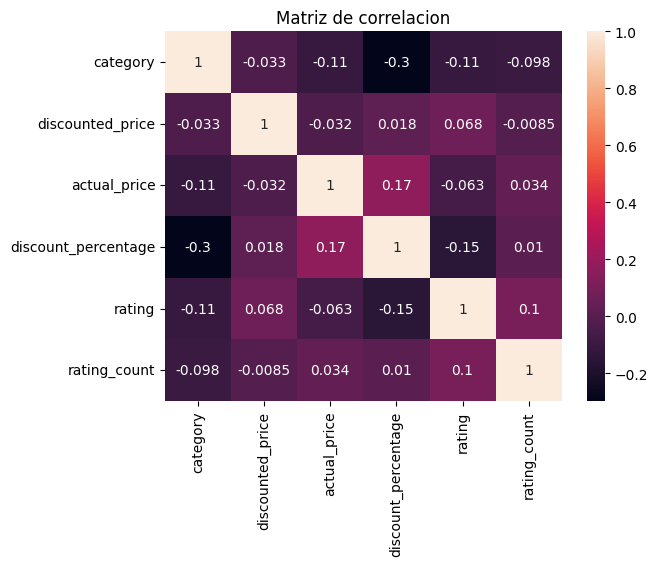

In [ ]:
sns.heatmap(nuevo_seller.corr(), annot=True)
plt.title("Matriz de correlacion")
plt.show()

En la matriz de correlación observamos que no hay una relación lineal, ni tampoco inversamente lineal entre ninguna de las variables. Pero no significa que no haya relación.

Regresión Logística

In [ ]:
reg_log = LogisticRegression()

In [ ]:
#Agregamos la nueva columna que será nuestro target "venta"
nuevo_seller['venta'] = (nuevo_seller['rating_count'] > 100).astype(int)
nuevo_seller

/tmp/ipython-input-3487440880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_seller['venta'] = (nuevo_seller['rating_count'] > 100).astype(int)


,category,discounted_price,actual_price,discount_percentage,rating,rating_count,venta
0,49,408,32,53,4.1,8131,1
1,49,408,32,53,4.1,8131,1
2,49,487,47,38,4.2,179692,1
3,72,350,313,12,4.3,27201,1
4,18,260,252,18,4.3,31534,1
...,...,...,...,...,...,...,...
1460,159,249,445,71,4.0,43,0
1461,136,29,170,42,2.0,2,0
1462,159,260,313,38,4.8,28,0
1463,10,243,445,72,5.0,1,0


In [ ]:
nuevo_seller.to_csv('nuevo_seller.csv', index=False)

In [ ]:
X = nuevo_seller.drop('venta', axis=1).values
y = nuevo_seller['venta'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = reg_log.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

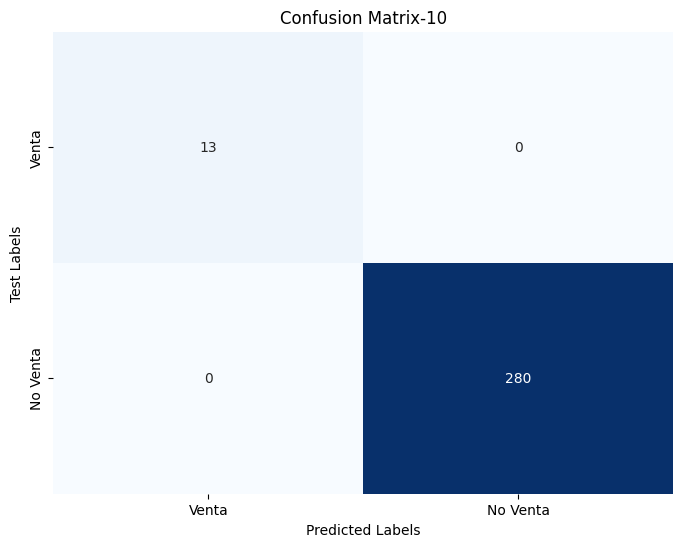

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Venta', 'No Venta'], yticklabels=['Venta', 'No Venta'])
plt.title('Confusion Matrix-10')
plt.xlabel('Predicted Labels')
plt.ylabel('Test Labels')
plt.show()

Puede predecir cuándo no será venta

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)

In [ ]:
mae

0.0

In [ ]:
mse

0.0

In [ ]:
r2

1.0

Puede predecir con gran precisión cuándo no será venta

# **Red neuronal secuencial con KERAS**
Probaremos el mismo dataset pero en una red neuronal con Keras

In [ ]:
# utilizamos el mismo dataset
df_seller = pd.read_csv("nuevo_seller.csv")
df_seller

,category,discounted_price,actual_price,discount_percentage,rating,rating_count,venta
0,49,408,32,53,4.1,8131,1
1,49,408,32,53,4.1,8131,1
2,49,487,47,38,4.2,179692,1
3,72,350,313,12,4.3,27201,1
4,18,260,252,18,4.3,31534,1
...,...,...,...,...,...,...,...
1459,159,249,445,71,4.0,43,0
1460,136,29,170,42,2.0,2,0
1461,159,260,313,38,4.8,28,0
1462,10,243,445,72,5.0,1,0


In [ ]:
#dividimos los datos en conjustos de entrenamiento y testing
train_data, test_data, train_labels, test_labels = train_test_split(
    df_seller.drop('venta', axis=1),
    df_seller['venta'],
    test_size=0.2,
    random_state=42
)

# 2. ESCALADO (ESTO ES LO NUEVO)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# 3. crear el modelo
modelo = LogisticRegression()

# 4. entrenar CON DATOS ESCALADOS
modelo.fit(train_data_scaled, train_labels)

# 5. predecir CON DATOS ESCALADOS
predicciones = modelo.predict(test_data_scaled)

In [ ]:
#armamos la red neuronal con 3 capas dense, 2 funciones de activacion Relu
#y una última capa con una función de activación sigmoide que será la que determine venta - no venta
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = (train_data.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compilamos el modelo con un optimizador adam y usamos binnary crossentropy para que pueda
#clasificar en venta - no venta
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Ajusta la función de pérdida según tu problema
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,217 (36.00 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.1175e-05 - val_accuracy: 0.9915 - val_loss: 0.0386
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.9526e-05 - val_accuracy: 0.9915 - val_loss: 0.0384
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.3266e-05 - val_accuracy: 0.9915 - val_loss: 0.0384
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8504e-05 - val_accuracy: 0.9915 - val_loss: 0.0386
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.4996e-05 - val_accuracy: 0.9915 - val_loss: 0.0373
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.4378e-05 - val_accuracy: 0.9915 - val_loss: 0.0388
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.7439e-05 - val_accuracy: 0.9915 - val_loss: 0.0389
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.7140e-05 - 

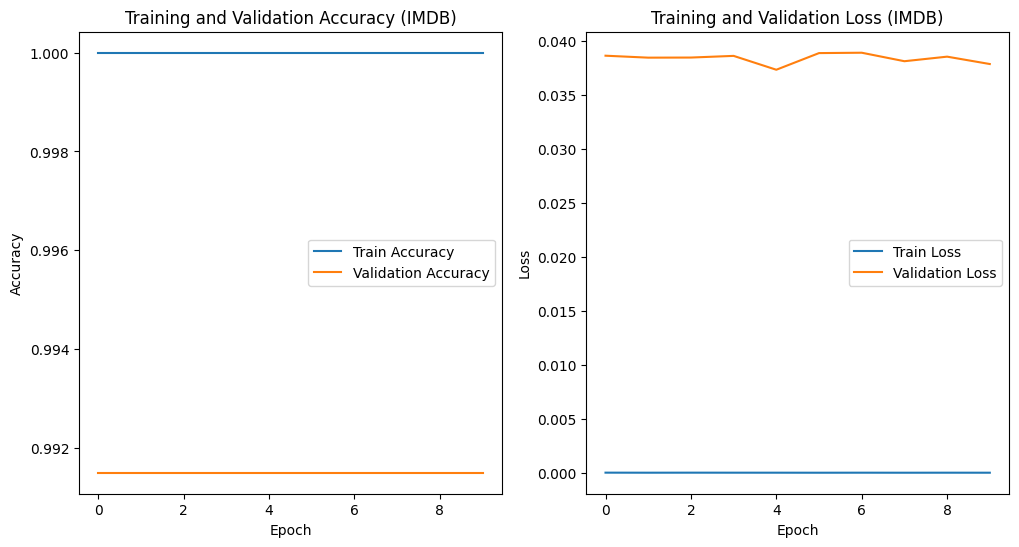

In [ ]:
# Entrenamos al modelos con 10 epochs y un batch size de 32
history_imdb = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_imdb.history['accuracy'], label='Train Accuracy')
plt.plot(history_imdb.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (IMDB)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_imdb.history['loss'], label='Train Loss')
plt.plot(history_imdb.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (IMDB)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9978 - loss: 0.0387     
Accuracy -10: 0.9965870380401611
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


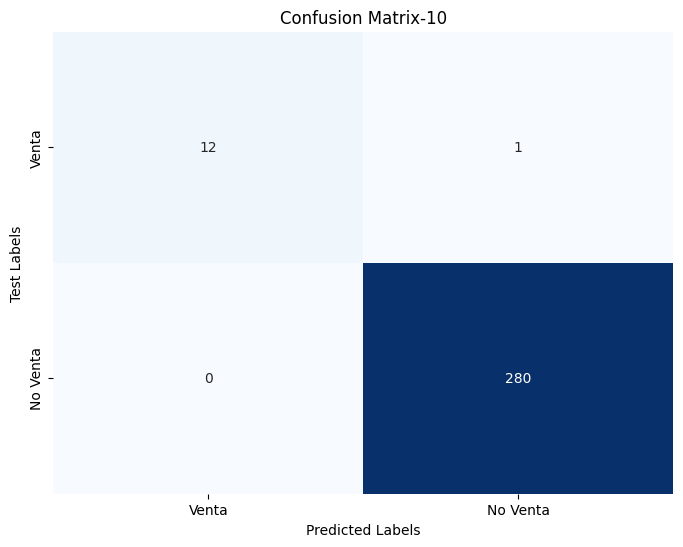

Classification Report-10:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00       280

    accuracy                           1.00       293
   macro avg       1.00      0.96      0.98       293
weighted avg       1.00      1.00      1.00       293



In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Accuracy -10: {test_acc}')

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int)

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(list(test_labels), list(predicted_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Venta', 'No Venta'], yticklabels=['Venta', 'No Venta'])
plt.title('Confusion Matrix-10')
plt.xlabel('Predicted Labels')
plt.ylabel('Test Labels')
plt.show()

# Mostrar el informe de clasificación
print("Classification Report-10:")
print(classification_report(test_labels, predicted_labels))

Predice con gran facilidad cuando no será venta. Las métricas de precisión demasiado altas lo que podría significar que al probar con nuevos datos no pueda predecir con la misma precisión.

**Hipótesis 2:** Clasificar los comentarios de una tienda virtual en positivos - negativos para conocer el humor y las emociones de los usuarios

# **BERT**

In [ ]:
#cargamos nuestro set de datos
data = []

with open('amazon_resenias.json', 'r') as archivo:
    for line in archivo:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

df = pd.DataFrame(data)
df

Error decoding JSON: Unterminated string starting at: line 1 column 71 (char 70)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
...,...,...,...,...,...,...,...,...,...
194229,A2NYK9KWFMJV4Y,B00KMRYSQ8,"Mike Tarrani ""Jazz Drummer""","[3, 3]",When I received a review sample of this batter...,5.0,Well thought out design for camping and harsh ...,1403740800,"06 26, 2014"
194230,A22CW0ZHY3NJH8,B00KMRYSQ8,Noname,"[1, 1]",I took the eBoot solar charger power bank with...,4.0,Real World Test on Camping Trip,1404777600,"07 8, 2014"
194231,A390XPHE9J7DBO,B00KN9UBYI,AIMEE A TAYLOR,"[0, 0]",I just put this in my keys and it works from a...,5.0,Easy To Use,1405036800,"07 11, 2014"
194232,A1Q1Z7IR79G52A,B00KN9UBYI,"Ann Ingersoll Madison Rain ""Ann""","[0, 0]",This is such a fun device to have around. I ha...,5.0,Great Portable Shutter for your phone! Works l...,1404691200,"07 7, 2014"


In [ ]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [ ]:
#limpiamos el dataset de las columnas que no necesitamos
df.drop(['reviewerID', 'asin', 'reviewerName', 'helpful','summary', 'unixReviewTime', 'reviewTime'],axis='columns',inplace=True)

In [ ]:
#renombramos las columnas
df= df.rename(columns={"reviewText":"Review","overall": "Rating"})

In [ ]:
#creamos una función que las resenias con un rating menor o igual a 3 se normalice a 0 como negativo
#caso contrario las resenias cuya puntuación sean mayores a 3 tendrán un valor de 1 como resenia positiva
#Esta columna será nuestro target para enseniarle al modelo
def normalizar(df) :
    if df['Rating'] <= 3.0 :
        puntuacion = 0 # negativo
    else :
        puntuacion = 1 # positivo

    return puntuacion

In [ ]:
#aplicamos la función
df['Rating'] = df.apply(normalizar , axis = 1)

In [ ]:
#contamos la cantidad de palabras que hay en cada resenia
df['review_len'] = [len(text.split()) for text in df.Review]

In [ ]:
#obtenemos la resenia con la mayor cantidad de palabras
df['review_len'].max()

5263

In [ ]:
#para que el modelo no sea tan pesado disminuimos el dataset a las resenias
#que no superen las 50 palabras
df = df[~(df['review_len'] > 30)]

In [ ]:
#nuestro dataset se ha reducido a 80468 resenias es aceptable para entrenar y probar el modelo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58902 entries, 4 to 194233
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Review      58902 non-null  object
 1   Rating      58902 non-null  int64 
 2   review_len  58902 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
df['review_len'].max()

30

In [ ]:
df

,Review,Rating,review_len
4,"awesome! stays on, and looks great. can be use...",1,23
5,These make using the home button easy. My daug...,0,23
6,Came just as described.. It doesn't come unstu...,1,23
7,it worked for the first week then it only char...,0,20
10,this case fits perfectly on the s4 and keeps m...,1,21
...,...,...,...
194221,"Fit the phone perfectly, Product was just as d...",1,13
194222,"Love it, makes my Iphone 4s shatterproof, very...",1,24
194225,"This is magnificent! Easy to install, Must hav...",1,30
194231,I just put this in my keys and it works from a...,1,18


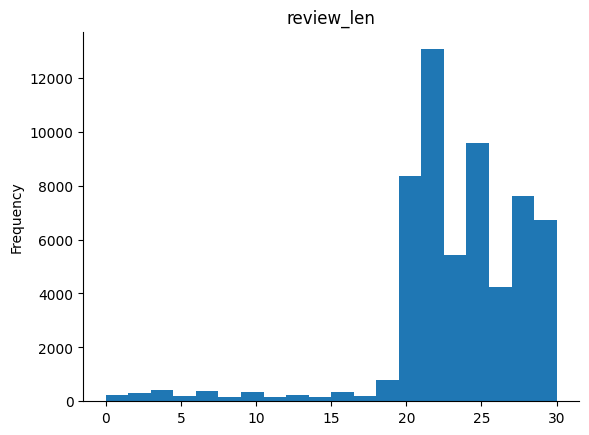

In [ ]:
#cantidad de palabras en una resenia
from matplotlib import pyplot as plt
df['review_len'].plot(kind='hist', bins=20, title='review_len')
plt.gca().spines[['top', 'right',]].set_visible(False)

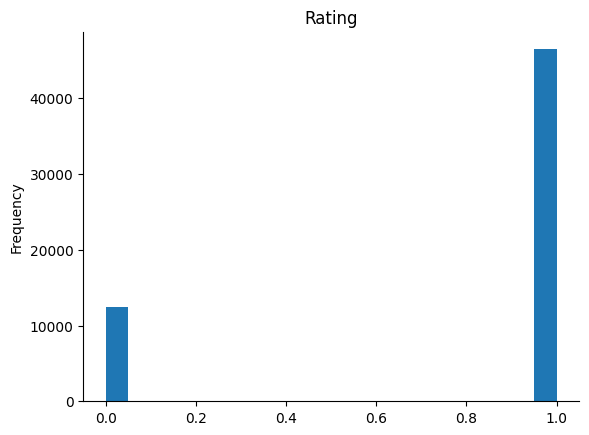

In [ ]:
#hay mas cantidad de resenias positivas que negativas por lo que el modelo aprendera
#rápidamente a identificar las resenias positivas
from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

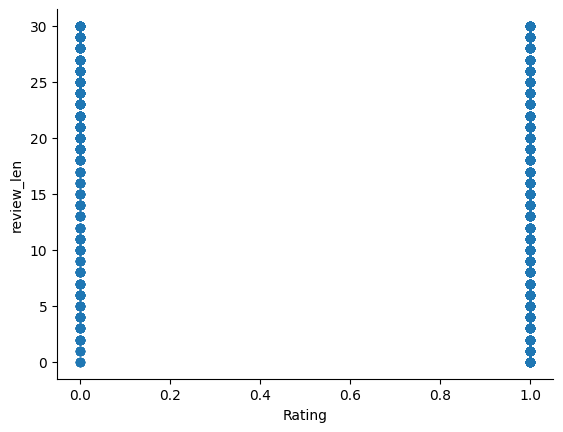

In [ ]:
#al parecer hay una buena distribución de cantidad de palabras entre resenias positivas y negativas
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='review_len', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Cargar el modelo preentrenado y el tokenizador de BERT para clasificación de secuencias
modelo_bert = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
tokenizador_bert = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
train_texts, test_texts, train_labels, test_labels = train_test_split(df["Review"].values.tolist(), df["Rating"].values.tolist(), test_size=0.2, random_state=42)

In [ ]:
# Tokenizar y preparar los datos
def tokenize_batch(texts):
    return tokenizador_bert(texts, padding=True, truncation=True, return_tensors="pt")

train_encodings = tokenize_batch(train_texts)
test_encodings = tokenize_batch(test_texts)

# Convertir etiquetas a tensores de PyTorch
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

# Crear conjuntos de datos de PyTorch
train_dataset = torch.utils.data.TensorDataset(train_encodings["input_ids"], train_encodings["attention_mask"], train_labels)
test_dataset = torch.utils.data.TensorDataset(test_encodings["input_ids"], test_encodings["attention_mask"], test_labels)

# Configuración del entrenamiento
batch_size = 50
epochs = 3
optimizer = torch.optim.AdamW(params=modelo_bert.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Specify the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, tokenizer, and optimizer
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)
scaler = GradScaler()

# Training loop with mixed precision
for epoch in tqdm(range(epochs), desc="Epochs"):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    model.train()

    for batch in tqdm(train_loader, desc="Batches", leave=False):
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3487038338.py:7: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/943 [00:00<?, ?it/s]

/tmp/ipython-input-3487038338.py:19: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Batches:   0%|          | 0/943 [00:00<?, ?it/s]

Batches:   0%|          | 0/943 [00:00<?, ?it/s]

Batches:   0%|          | 0/236 [00:00<?, ?it/s]

Accuracy: 0.9228
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      2539
           1       0.95      0.96      0.95      9242

    accuracy                           0.92     11781
   macro avg       0.89      0.88      0.88     11781
weighted avg       0.92      0.92      0.92     11781



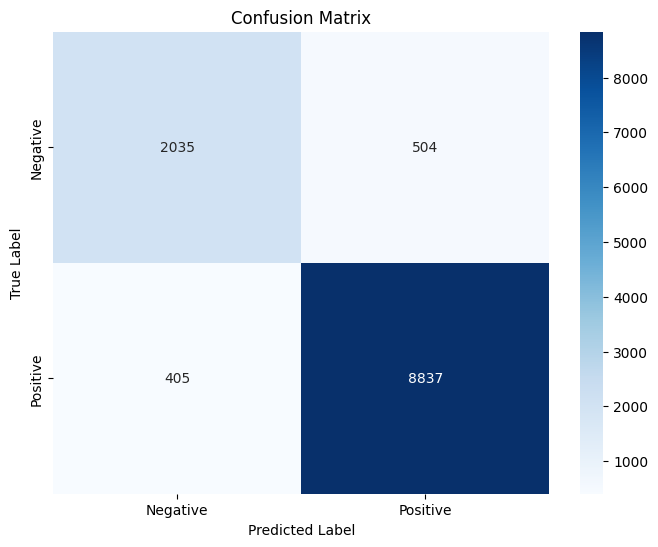

In [ ]:
# Model evaluation
model.eval()
predictions = []

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Batches", leave=False):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())

# Convert predictions to numpy array
predictions = np.array(predictions)

# Calculate accuracy
accuracy = accuracy_score(test_labels.numpy(), predictions)
print(f"Accuracy: {accuracy:.4f}")
# Generate and print classification report
classification_report_str = classification_report(test_labels.numpy(), predictions)
print("Classification Report:\n", classification_report_str)

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(test_labels.numpy(), predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Puede predecir con bastante precisión cuando son resenias positivas más que negativas pero ello se debe a que al disminuir el dataset a 30 palabras observamos que las resenias positivas son mayores que las negativas lo que explica que el modelo refleje estos valores. Si utilizamos mayor cantidad de palabras consume más recursos y por ende se interrumpe la conexión del entorno

# **TENSOR FLOW KERAS**

In [ ]:
#dividimos los datos
X_train , X_val , Y_train , Y_val = train_test_split(df['Review'] , df['Rating'] , train_size = 0.80 , random_state = 42)

In [ ]:
#usamos corpus para extraer las palabras más comunes y poder tokenizar
corpus = [word for text in df['Review'] for word in text.split()]
words_count = Counter(corpus)
sorted_words = words_count.most_common()
sorted_words

[('the', 50142),
 ('and', 42920),
 ('I', 38488),
 ('it', 35113),
 ('to', 29051),
 ('a', 29019),
 ('is', 23319),
 ('for', 22656),
 ('my', 21975),
 ('this', 18733),
 ('phone', 12526),
 ('on', 11458),
 ('of', 11436),
 ('but', 11349),
 ('case', 11155),
 ('with', 11053),
 ('was', 10256),
 ('in', 9969),
 ('very', 9778),
 ('not', 9582),
 ('It', 8972),
 ('as', 8433),
 ('great', 8309),
 ('This', 8253),
 ('have', 8194),
 ('like', 7761),
 ('good', 7633),
 ('that', 7383),
 ('you', 6814),
 ('so', 6708),
 ('love', 6495),
 ('The', 6442),
 ('i', 6261),
 ('one', 5650),
 ('works', 5159),
 ('it.', 5123),
 ('just', 5084),
 ('are', 4869),
 ('would', 4853),
 ('screen', 4571),
 ('really', 4531),
 ('well', 4087),
 ('recommend', 3930),
 ('at', 3795),
 ('your', 3781),
 ('product', 3743),
 ('all', 3730),
 ('they', 3702),
 ('get', 3689),
 ('use', 3653),
 ('what', 3635),
 ('phone.', 3577),
 ('be', 3455),
 ('will', 3413),
 ('its', 3411),
 ('fit', 3382),
 ('fits', 3351),
 ('nice', 3331),
 ('price', 3272),
 ('when', 

In [ ]:
# definimos los parámetros para el tokenizador
VOCAB_SIZE = len(sorted_words)
EMBEDDING_DIM = 300
MAX_LEN = np.max(df['review_len'])

In [ ]:
#armamos la funcion tokenizadora
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def function_tokenizer(resenias_train) :
    tokenizer = Tokenizer(num_words=VOCAB_SIZE , oov_token='<OOV>')
    tokenizer.fit_on_texts(resenias_train)
    seqs = tokenizer.texts_to_sequences(resenias_train)
    pad_seqs = pad_sequences(seqs , maxlen = MAX_LEN , padding='post')

    return pad_seqs

In [ ]:
#aplicamos la tokenización
X_train = function_tokenizer(X_train)
X_val = function_tokenizer(X_val)

In [ ]:
#creamos un modelo secuencial con una capa embebida donde pasamos los parametros
#2 capas bidireccionales
#2 capas dense una con activación relu y otra con sigmoide
model = Sequential([
    Embedding(VOCAB_SIZE + 1 , EMBEDDING_DIM , input_length=MAX_LEN) ,
    Bidirectional(LSTM(265 , return_sequences=True)) ,
    Bidirectional(LSTM(128)) ,
    Dense(64 , activation='relu') ,
    Dense(1 , activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#compilamos con entropía binaria
model.compile(
    loss = 'binary_crossentropy' ,
    optimizer = 'adam' ,
    metrics=['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
    )

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train ,
    Y_train ,
    epochs = 8,
    batch_size = 30,
    validation_data=(X_val , Y_val)
)

Epoch 1/8
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9897 - loss: 0.0295 - precision: 0.9919 - recall: 0.9952 - val_accuracy: 0.7006 - val_loss: 1.7004 - val_precision: 0.7969 - val_recall: 0.8299
Epoch 2/8
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9918 - loss: 0.0224 - precision: 0.9935 - recall: 0.9961 - val_accuracy: 0.7181 - val_loss: 1.8260 - val_precision: 0.7992 - val_recall: 0.8557
Epoch 3/8
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9944 - loss: 0.0169 - precision: 0.9955 - recall: 0.9974 - val_accuracy: 0.7047 - val_loss: 2.1660 - val_precision: 0.7956 - val_recall: 0.8391
Epoch 4/8
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9951 - loss: 0.0138 - precision: 0.9965 - recall: 0.9973 - val_accuracy: 0.7043 - val_loss: 1.9874 - val_precision: 0.7985 - val_recall: 0.8334
Epoch 5/8
1571/1571 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9957 - loss: 0.0122 - precision: 0.9968 - recall: 0.9978 - val_accuracy: 0.7072

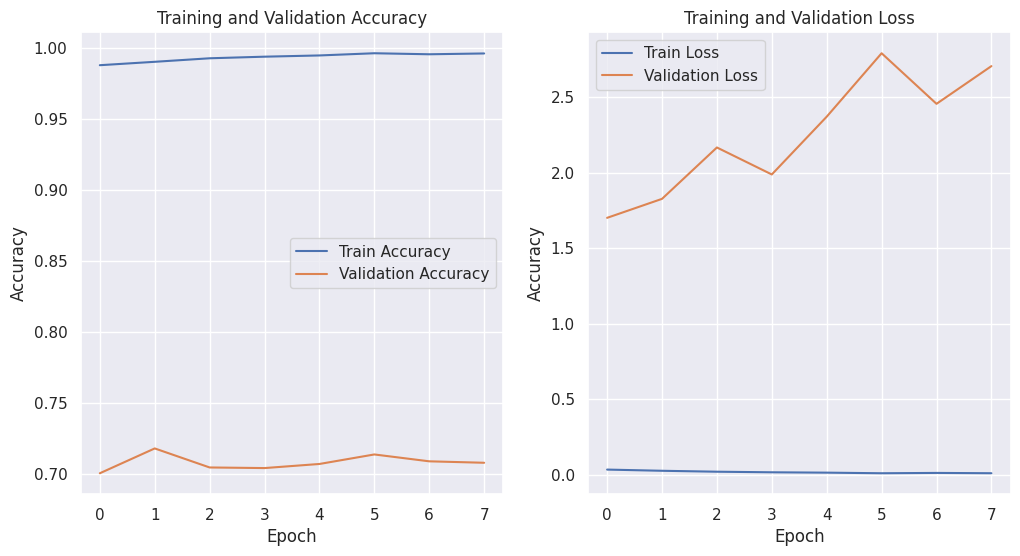

In [ ]:
sns.set()
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
y_val_pred = model.predict(X_val)
y_val_pred = y_val_pred.round()

369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


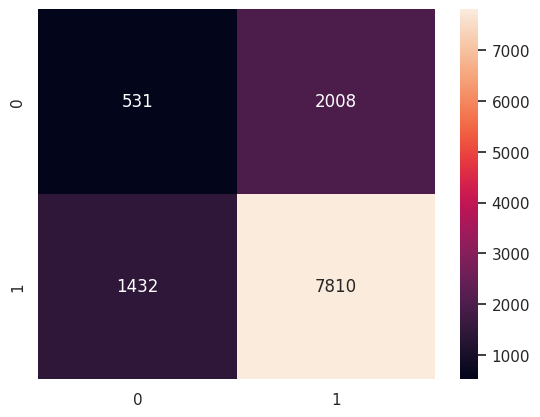

In [ ]:
lstm_cm = confusion_matrix(Y_val , y_val_pred)
sns.heatmap(lstm_cm, annot=True,fmt='3g')
plt.show()

No ha podido aprender con la precisión necesaria

# **Simple RNN**

In [ ]:
model_red = models.Sequential([
    layers.Embedding(VOCAB_SIZE + 1 , EMBEDDING_DIM , input_length=MAX_LEN),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

model_red.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model_red.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_red.fit(
    X_train ,
    Y_train ,
    epochs = 10,
    batch_size = 64,
    validation_data=(X_val , Y_val)
)

Epoch 1/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8120 - loss: 0.4531 - precision: 0.8269 - recall: 0.9666 - val_accuracy: 0.7219 - val_loss: 0.6004 - val_precision: 0.7999 - val_recall: 0.8609
Epoch 2/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9032 - loss: 0.2511 - precision: 0.9290 - recall: 0.9499 - val_accuracy: 0.7486 - val_loss: 0.6454 - val_precision: 0.7993 - val_recall: 0.9074
Epoch 3/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9178 - loss: 0.2147 - precision: 0.9409 - recall: 0.9557 - val_accuracy: 0.7572 - val_loss: 0.8581 - val_precision: 0.7970 - val_recall: 0.9264
Epoch 4/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9385 - loss: 0.1716 - precision: 0.9550 - recall: 0.9682 - val_accuracy: 0.7429 - val_loss: 0.7585 - val_precision: 0.7996 - val_recall: 0.8971
Epoch 5/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9541 - loss: 0.1393 - precision: 0.9649 - recall: 0.9774 - val_accuracy: 0.7195 - val_loss: 

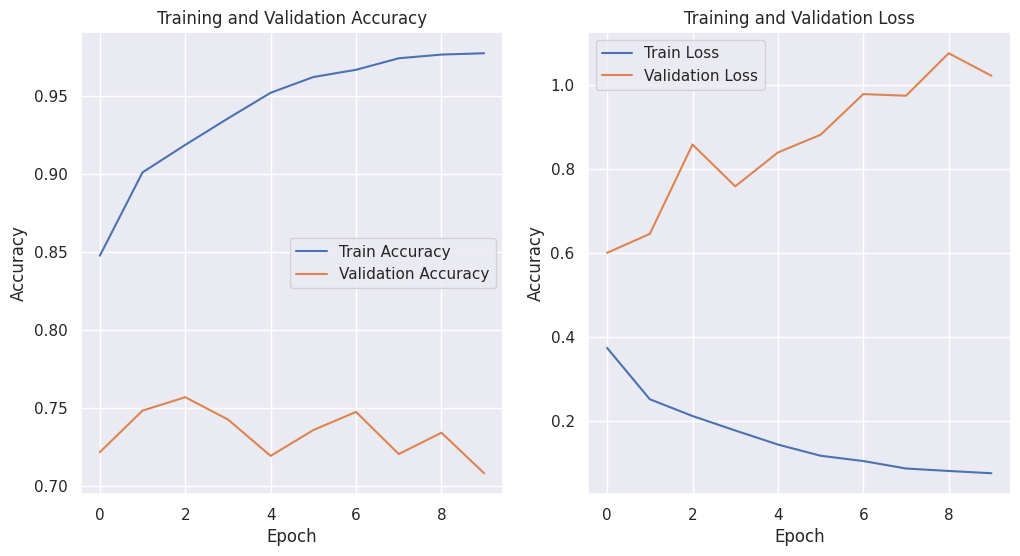

In [ ]:
sns.set()
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

No ha podido aprender